In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab as pl
import requests as rs
%matplotlib inline

In [2]:
url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

In [9]:
response= rs.get(url,stream=True)
local_filename = r'C:\Users\msaur\Documents\projects python\Estimating Carbon Footprints in Automobile\fuelConsumptionData.csv'
# Save the file locally
with open(local_filename, 'wb') as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

print(f'{local_filename} has been downloaded.')

C:\Users\msaur\Documents\projects python\Estimating Carbon Footprints in Automobile\fuelConsumptionData.csv has been downloaded.


In [11]:
df=pd.read_csv(url)
df.head(6)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230


# Data Exploration

In [12]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


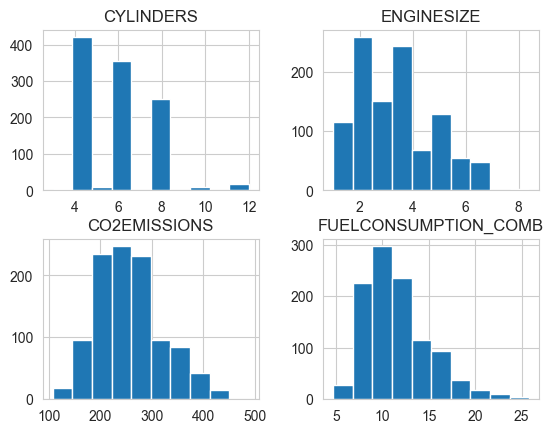

In [14]:
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

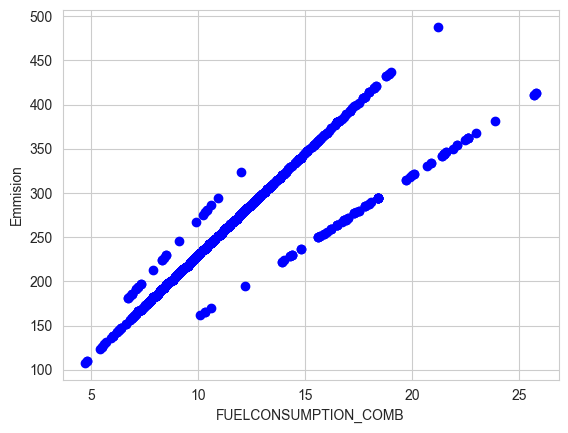

In [16]:
#visualising relation 
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emmision')
plt.show()

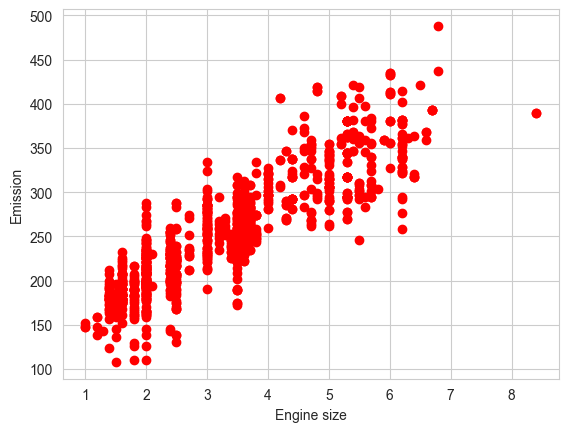

In [17]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,color = 'red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

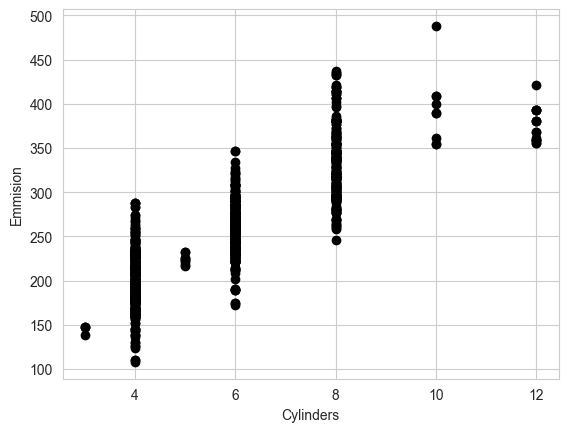

In [20]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,color='black')
plt.xlabel("Cylinders")
plt.ylabel("Emmision")
plt.show()

# Creating train and test dataset

 Here, we are splitting our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing.

In [21]:
msk= np.random.rand(len(df))< 0.8
train = cdf[msk]
test= cdf[~msk]

### Simple Regression Model

Train data distribution

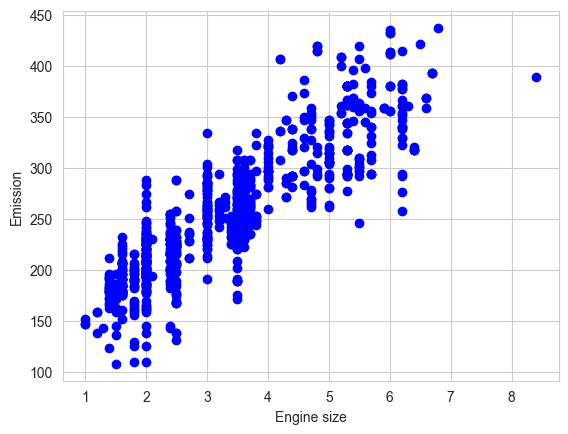

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Modeling

In [24]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.70419905]]
Intercept:  [124.07749699]


### Plot outputs

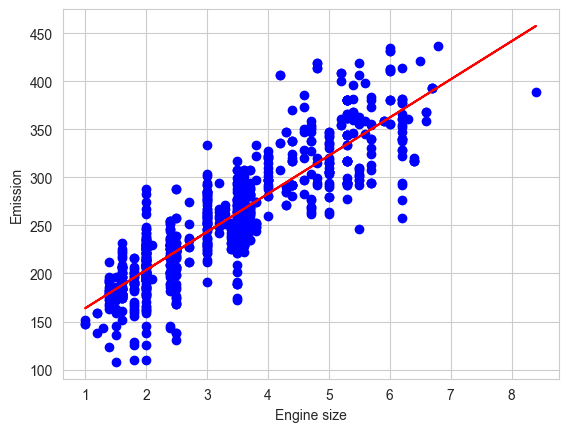

In [28]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


# Evaluation

In [30]:
from sklearn.metrics import r2_score

test_x =np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_= regr.predict(test_x)



print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )


Mean absolute error: 23.12
Residual sum of squares (MSE): 876.46
R2-score: 0.77


In [34]:
regr.predict(test_x)

array([[263.04219366],
       [263.04219366],
       [263.04219366],
       [219.36757471],
       [263.04219366],
       [310.68723251],
       [243.19009413],
       [243.19009413],
       [290.83513299],
       [243.19009413],
       [243.19009413],
       [203.48589509],
       [203.48589509],
       [203.48589509],
       [243.19009413],
       [298.7759728 ],
       [298.7759728 ],
       [298.7759728 ],
       [298.7759728 ],
       [203.48589509],
       [243.19009413],
       [267.01261356],
       [267.01261356],
       [203.48589509],
       [223.33799461],
       [267.01261356],
       [267.01261356],
       [267.01261356],
       [370.24353108],
       [370.24353108],
       [370.24353108],
       [370.24353108],
       [267.01261356],
       [267.01261356],
       [179.66337566],
       [219.36757471],
       [223.33799461],
       [267.01261356],
       [219.36757471],
       [294.8055529 ],
       [334.50975194],
       [370.24353108],
       [294.8055529 ],
       [334

Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.


In [35]:
train_x= train[['FUELCONSUMPTION_COMB']]
test_x= test[['FUELCONSUMPTION_COMB']]

In [39]:
regr= linear_model.LinearRegression()
regr.fit(train_x,train_y)


LinearRegression()

In [41]:
predictions= regr.predict(test_x)
predictions

array([[248.60865676],
       [240.44241735],
       [230.64293006],
       [217.576947  ],
       [237.17592158],
       [318.8383157 ],
       [250.24190464],
       [204.51096394],
       [284.54011017],
       [269.84087923],
       [269.84087923],
       [215.94369911],
       [176.74574994],
       [209.41070759],
       [196.34472453],
       [274.74062288],
       [266.57438347],
       [307.40558052],
       [292.70634958],
       [215.94369911],
       [264.94113558],
       [273.10737499],
       [255.14164829],
       [227.37643429],
       [214.31045123],
       [250.24190464],
       [251.87515252],
       [253.50840041],
       [338.43729029],
       [309.0388284 ],
       [338.43729029],
       [307.40558052],
       [268.20763135],
       [250.24190464],
       [194.71147664],
       [215.94369911],
       [224.10993853],
       [240.44241735],
       [240.44241735],
       [341.70378605],
       [343.33703393],
       [297.60609323],
       [273.10737499],
       [349

In [42]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions-test_y_)))

Mean absolute error: 24.45
